In [36]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

import pickle

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv( "/home/bautista/Datos/Machine-Learning-Datos/FeatureEngineering/mixdf_time_series.csv" )
df = df.drop(columns = {'Unnamed: 0', 'Delivery_Year', 'Delivery_Quarter'})
df

,Region,Total_Amount,Años en entregar,Month Created,Product_Name,Opportunity_Owner,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Decision,Promedio_Region_Por_Quarter,Promedio_Owner_Por_Year_And_Quarter,Lag_1,Delta
0,EMEA,2.773332,0,2,Other,Other,0,1,0,2.496126,2.585640,NaN,3.088401
1,EMEA,2.740425,0,2,Product_Name_210,Other,1,1,0,2.486798,2.545803,2.585640,2.098247
2,EMEA,2.999379,0,3,Product_Name_432,Other,1,1,0,2.499777,2.852610,2.545803,2.583974
3,APAC,2.780462,0,7,Other,Other,0,0,0,2.448872,2.594236,2.852610,1.552569
4,APAC,2.647444,0,2,Product_Name_91,Person_Name_11,1,1,1,2.467621,2.468684,NaN,3.019307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13578,Americas,2.845924,1,6,Product_Name_488,Person_Name_8,1,1,1,2.544620,2.706302,2.740744,2.097463
13579,Americas,2.819796,1,6,Product_Name_483,Person_Name_8,1,1,1,2.544620,2.706302,2.740744,2.097463
13580,Americas,2.845924,1,6,Product_Name_488,Person_Name_8,1,1,1,2.544620,2.706302,2.740744,2.097463
13581,Americas,3.032890,1,10,Product_Name_445,Person_Name_8,1,1,0,2.544620,2.706302,2.740744,2.097463


In [38]:
df = df.fillna(0)

In [39]:
df.describe()

,Total_Amount,Años en entregar,Month Created,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Decision,Promedio_Region_Por_Quarter,Promedio_Owner_Por_Year_And_Quarter,Lag_1,Delta
count,13583.000000,13583.000000,13583.000000,13583.000000,13583.00000,13583.000000,13583.000000,13583.000000,13583.000000,13583.000000
mean,2.651080,0.255025,6.574321,0.569388,0.77332,0.554001,2.449497,2.444527,2.339767,2.183309
std,0.177250,0.466251,3.421165,0.495180,0.41870,0.497094,0.098289,0.142587,0.531066,0.214954
min,0.000000,-1.000000,1.000000,0.000000,0.00000,0.000000,2.219173,1.336753,0.000000,0.000000
25%,2.588674,0.000000,4.000000,0.000000,1.00000,0.000000,2.437621,2.401642,2.389793,2.088779
50%,2.656112,0.000000,6.000000,1.000000,1.00000,1.000000,2.491107,2.465992,2.466176,2.159336
75%,2.753412,0.000000,10.000000,1.000000,1.00000,1.000000,2.499777,2.544160,2.546746,2.217261
max,3.104954,5.000000,12.000000,1.000000,1.00000,1.000000,2.553549,2.973900,2.852610,3.240224


# Encode

In [40]:
Mean_encoded_subject_region = df.groupby(['Region'])['Decision'].mean().to_dict() 

df['Region'] =  df['Region'].map(Mean_encoded_subject_region)

#--------------------------------------------------------------------------------------------

mean_encoded_product = df.groupby("Product_Name")["Decision"].mean().to_dict()

df["Product_Name"] = df["Product_Name"].map(mean_encoded_product)

#--------------------------------------------------------------------------------------------

#Mean_encoded_subject_quarter = df.groupby(['Delivery_Quarter'])['Decision'].mean().to_dict() 

#df['Delivery_Quarter'] =  df['Delivery_Quarter'].map(Mean_encoded_subject_quarter)

#--------------------------------------------------------------------------------------------

Mean_encoded_subject_owner = df.groupby(['Opportunity_Owner'])['Decision'].mean().to_dict() 

df['Opportunity_Owner'] =  df['Opportunity_Owner'].map(Mean_encoded_subject_owner)

# Split

In [41]:
X_test = df.tail(math.floor(df.shape[0]*0.20)).drop(columns = {'Decision'})
y_test = df.tail(math.floor(df.shape[0]*0.20))['Decision']
X_train = df.head(round(df.shape[0]*0.80)).drop(columns = {'Decision'})
y_train = df.head(round(df.shape[0]*0.80))['Decision']
X_train

,Region,Total_Amount,Años en entregar,Month Created,Product_Name,Opportunity_Owner,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Promedio_Region_Por_Quarter,Promedio_Owner_Por_Year_And_Quarter,Lag_1,Delta
0,0.532255,2.773332,0,2,0.445844,0.000000,0,1,2.496126,2.585640,0.000000,3.088401
1,0.532255,2.740425,0,2,0.283582,0.000000,1,1,2.486798,2.545803,2.585640,2.098247
2,0.532255,2.999379,0,3,0.009174,0.000000,1,1,2.499777,2.852610,2.545803,2.583974
3,0.587888,2.780462,0,7,0.445844,0.000000,0,0,2.448872,2.594236,2.852610,1.552569
4,0.587888,2.647444,0,2,0.900000,0.371429,1,1,2.467621,2.468684,0.000000,3.019307
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.587888,2.817755,0,9,0.055556,0.252427,1,1,2.448872,2.594527,2.441786,2.357726
10862,0.587888,2.793234,0,10,0.333333,0.252427,1,1,2.448872,2.594527,2.441786,2.357726
10863,0.587888,2.541749,0,10,0.722798,0.252427,1,1,2.448872,2.594527,2.441786,2.357726
10864,0.587888,2.772403,0,10,0.333333,0.252427,1,1,2.448872,2.594527,2.441786,2.357726


# Random Search

In [42]:
import sklearn as sk
import sklearn.neural_network


lr = 0.001           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.
nr = [3, 15, 10]
nd = [1,20,6,2]

# Creamos el objeto del modelo de red neuronal multicapa.
modelRegresor = sk.neural_network.MLPRegressor(solver='adam', 
                                     activation = 'logistic',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)

In [43]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [44]:
params = {
        'activation': ['logistic'],
        'alpha': [0.0001,0.10, 0.001,1, 10],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'hidden_layer_sizes': [tuple(nn[1:]), tuple(nr[1:]), tuple(nd[1:])],
        'learning_rate_init' : [0.1,0.01, 0.001],
        'n_iter_no_change' : [10, 1000, 100, 10000],
        'batch_size' : [64, 100, 200]
        }

In [45]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(modelRegresor, param_distributions=params, n_iter=param_comb,scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   57.2s finished


Iteration 1, loss = 0.15286621
Iteration 2, loss = 0.12124794
Iteration 3, loss = 0.11158445
Iteration 4, loss = 0.09238318
Iteration 5, loss = 0.08311002
Iteration 6, loss = 0.08056831
Iteration 7, loss = 0.08010254
Iteration 8, loss = 0.07934005
Iteration 9, loss = 0.07984927
Iteration 10, loss = 0.07987594
Iteration 11, loss = 0.07884069
Iteration 12, loss = 0.07987751
Iteration 13, loss = 0.07891298
Iteration 14, loss = 0.07854949
Iteration 15, loss = 0.07867298
Iteration 16, loss = 0.07866654
Iteration 17, loss = 0.07810264
Iteration 18, loss = 0.07804150
Iteration 19, loss = 0.07807860
Iteration 20, loss = 0.07744924
Iteration 21, loss = 0.07812205
Iteration 22, loss = 0.07767567
Iteration 23, loss = 0.07666008
Iteration 24, loss = 0.07688204
Iteration 25, loss = 0.07626102
Iteration 26, loss = 0.07619056
Iteration 27, loss = 0.07536804
Iteration 28, loss = 0.07507550
Iteration 29, loss = 0.07521294
Iteration 30, loss = 0.07470496
Iteration 31, loss = 0.07536918
Iteration 32, los

In [46]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([17.96136077, 15.00677737, 16.94072477, 15.00736761,  7.41590397]), 'std_fit_time': array([0.20277143, 0.55488121, 0.55154973, 0.10526689, 0.82574097]), 'mean_score_time': array([0.02038074, 0.02721755, 0.01465074, 0.01926422, 0.01053929]), 'std_score_time': array([0.00453565, 0.0139121 , 0.00217846, 0.00528109, 0.0013474 ]), 'param_n_iter_no_change': masked_array(data=[1000, 1000, 1000, 100, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate_init': masked_array(data=[0.1, 0.01, 0.1, 0.001, 0.1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=['invscaling', 'constant', 'adaptive', 'adaptive',
                   'constant'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(dat

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_iter_no_change,param_learning_rate_init,param_learning_rate,param_hidden_layer_sizes,param_batch_size,param_alpha,param_activation,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,17.961361,0.202771,0.020381,0.004536,1000,0.1,invscaling,"(16, 8, 1)",200,0.001,logistic,"{'n_iter_no_change': 1000, 'learning_rate_init...",0.871458,0.875594,0.864581,0.870545,0.004542,2
1,15.006777,0.554881,0.027218,0.013912,1000,0.01,constant,"(15, 10)",200,0.001,logistic,"{'n_iter_no_change': 1000, 'learning_rate_init...",0.875852,0.875381,0.866839,0.872691,0.004142,1
2,16.940725,0.551550,0.014651,0.002178,1000,0.1,adaptive,"(16, 8, 1)",200,1,logistic,"{'n_iter_no_change': 1000, 'learning_rate_init...",0.297637,0.590623,0.561686,0.483315,0.131825,4
3,15.007368,0.105267,0.019264,0.005281,100,0.001,adaptive,"(15, 10)",200,0.0001,logistic,"{'n_iter_no_change': 100, 'learning_rate_init'...",0.856505,0.856574,0.853657,0.855579,0.001359,3
4,7.415904,0.825741,0.010539,0.001347,100,0.1,constant,"(15, 10)",200,10,logistic,"{'n_iter_no_change': 100, 'learning_rate_init'...",0.498580,0.438142,0.496635,0.477786,0.028043,5


In [47]:
LinReg_pred_random = random_search.predict(X_test)

In [48]:
probando = pd.DataFrame()
probando['target'] = LinReg_pred_random
probando.describe()

,target
count,2716.000000
mean,0.564873
std,0.306486
min,-0.094949
25%,0.263380
50%,0.638851
75%,0.829741
max,1.024838


In [49]:
random_search.score(X_test, y_test)

0.8371118853428972

In [50]:
loss_random = log_loss(y_test  , LinReg_pred_random)
print(f"Log loss is {loss_random}")

Log loss is 0.4936496438291976


# No Serch

In [51]:
import sklearn as sk
import sklearn.neural_network


lr = 0.001           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
modelRegresor = sk.neural_network.MLPRegressor(solver='adam', 
                                     activation = 'logistic',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)

In [52]:
modelRegresor.fit(X_train, y_train)

Iteration 1, loss = 0.13060642
Iteration 2, loss = 0.12401566
Iteration 3, loss = 0.12318567
Iteration 4, loss = 0.12089604
Iteration 5, loss = 0.11565160
Iteration 6, loss = 0.10664636
Iteration 7, loss = 0.09707310
Iteration 8, loss = 0.09038744
Iteration 9, loss = 0.08628152
Iteration 10, loss = 0.08388413
Iteration 11, loss = 0.08258197
Iteration 12, loss = 0.08162574
Iteration 13, loss = 0.08107874
Iteration 14, loss = 0.08072407
Iteration 15, loss = 0.08020059
Iteration 16, loss = 0.08008084
Iteration 17, loss = 0.08000590
Iteration 18, loss = 0.07969718
Iteration 19, loss = 0.07945850
Iteration 20, loss = 0.07943948
Iteration 21, loss = 0.07925319
Iteration 22, loss = 0.07914566
Iteration 23, loss = 0.07920133
Iteration 24, loss = 0.07893467
Iteration 25, loss = 0.07893689
Iteration 26, loss = 0.07888901
Iteration 27, loss = 0.07876344
Iteration 28, loss = 0.07872305
Iteration 29, loss = 0.07866691
Iteration 30, loss = 0.07859939
Iteration 31, loss = 0.07855010
Iteration 32, los

MLPRegressor(activation='logistic', batch_size=64,
             hidden_layer_sizes=(16, 8, 1), n_iter_no_change=1000,
             verbose=True)

In [53]:
LinReg_pred = modelRegresor.predict(X_test)

In [54]:
probando = pd.DataFrame()
probando['target'] = LinReg_pred
probando.describe()

,target
count,2716.000000
mean,0.611235
std,0.306991
min,0.006125
25%,0.318751
50%,0.717554
75%,0.866010
max,1.046227


In [55]:
modelRegresor.score(X_test, y_test)

0.34958286367955127

In [56]:
loss = log_loss(y_test  , LinReg_pred)
print(f"Log loss is {loss}")

Log loss is 0.48693623074410985


In [57]:
#pickle.dump(modelRegresor, open('modeloRegresorRN.p', 'wb'))

# Kaggle

In [58]:
DataFrame_test = pd.read_csv( "/home/bautista/Datos/Machine-Learning-Datos/FeatureEngineering/mixdf_time_series_test.csv" )
DataFrame_test

,Unnamed: 0,Opportunity_ID,Region,Total_Amount,Años en entregar,Month Created,Product_Name,Opportunity_Owner,Delivery_Year,Delivery_Quarter,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Promedio_Region_Por_Quarter,Promedio_Owner_Por_Year_And_Quarter,Lag_1,Delta
0,171,10792,EMEA,12.087389,0,1,Product_Name_201,Person_Name_13,2019,Q1,1,1,11.753909,11.001991,NaN,11.000704
1,226,10806,EMEA,10.325097,0,1,Product_Name_241,Person_Name_13,2019,Q1,0,1,11.753909,11.001991,NaN,11.000704
2,238,10812,EMEA,11.479095,0,1,Product_Name_303,Person_Name_13,2019,Q1,1,1,11.753909,11.001991,NaN,11.000704
3,270,10836,EMEA,10.155219,0,1,Product_Name_182,Person_Name_13,2019,Q1,1,1,11.753909,11.001991,NaN,11.000704
4,282,10845,EMEA,9.975017,0,1,Product_Name_283,Person_Name_13,2019,Q1,1,1,11.753909,11.001991,NaN,11.000704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2519,12347,Americas,15.340732,1,4,Product_Name_487,Person_Name_9,2020,Q2,1,1,13.556432,15.849836,0.905656,15.849826
1563,2520,12348,Americas,16.193551,1,4,Product_Name_475,Person_Name_9,2020,Q2,1,1,13.556432,15.849836,0.905656,15.849826
1564,2521,12349,Americas,15.831542,1,4,Product_Name_432,Person_Name_9,2020,Q2,1,1,13.556432,15.849836,0.905656,15.849826
1565,2522,12350,Americas,16.193551,1,4,Product_Name_475,Person_Name_9,2020,Q3,1,1,14.756877,16.193551,0.939492,16.193544


In [59]:
subir = pd.DataFrame()
subir['Opportunity_ID'] = DataFrame_test['Opportunity_ID']
DataFrame_test = DataFrame_test.drop(columns = {'Opportunity_ID', 'Unnamed: 0', 'Delivery_Year', 'Delivery_Quarter'}).fillna(0)
DataFrame_test

,Region,Total_Amount,Años en entregar,Month Created,Product_Name,Opportunity_Owner,"Pricing, Delivery_Terms_Approved","Pricing, Delivery_Terms_Quote_Appr",Promedio_Region_Por_Quarter,Promedio_Owner_Por_Year_And_Quarter,Lag_1,Delta
0,EMEA,12.087389,0,1,Product_Name_201,Person_Name_13,1,1,11.753909,11.001991,0.000000,11.000704
1,EMEA,10.325097,0,1,Product_Name_241,Person_Name_13,0,1,11.753909,11.001991,0.000000,11.000704
2,EMEA,11.479095,0,1,Product_Name_303,Person_Name_13,1,1,11.753909,11.001991,0.000000,11.000704
3,EMEA,10.155219,0,1,Product_Name_182,Person_Name_13,1,1,11.753909,11.001991,0.000000,11.000704
4,EMEA,9.975017,0,1,Product_Name_283,Person_Name_13,1,1,11.753909,11.001991,0.000000,11.000704
...,...,...,...,...,...,...,...,...,...,...,...,...
1562,Americas,15.340732,1,4,Product_Name_487,Person_Name_9,1,1,13.556432,15.849836,0.905656,15.849826
1563,Americas,16.193551,1,4,Product_Name_475,Person_Name_9,1,1,13.556432,15.849836,0.905656,15.849826
1564,Americas,15.831542,1,4,Product_Name_432,Person_Name_9,1,1,13.556432,15.849836,0.905656,15.849826
1565,Americas,16.193551,1,4,Product_Name_475,Person_Name_9,1,1,14.756877,16.193551,0.939492,16.193544


# Encoding

In [60]:
DataFrame_test['Region'] =  DataFrame_test['Region'].map(Mean_encoded_subject_region)

#--------------------------------------------------------------------------------------------

DataFrame_test["Product_Name"] = DataFrame_test["Product_Name"].map(mean_encoded_product)

#--------------------------------------------------------------------------------------------

#DataFrame_test['Delivery_Quarter'] =  DataFrame_test['Delivery_Quarter'].map(Mean_encoded_subject_quarter)

#--------------------------------------------------------------------------------------------

DataFrame_test['Opportunity_Owner'] =  DataFrame_test['Opportunity_Owner'].map(Mean_encoded_subject_owner)
DataFrame_test = DataFrame_test.fillna(0.406068)

In [61]:
DataFrame_test.isnull().sum()

Region                                 0
Total_Amount                           0
Años en entregar                       0
Month Created                          0
Product_Name                           0
Opportunity_Owner                      0
Pricing, Delivery_Terms_Approved       0
Pricing, Delivery_Terms_Quote_Appr     0
Promedio_Region_Por_Quarter            0
Promedio_Owner_Por_Year_And_Quarter    0
Lag_1                                  0
Delta                                  0
dtype: int64

# Prediction

In [62]:
pred_posta = modelRegresor.predict(DataFrame_test)

In [63]:
subir['target'] = pred_posta
subir.set_index('Opportunity_ID', inplace = True)
subir

,target
Opportunity_ID,
10792,-0.003523
10806,0.008957
10812,-0.003029
10836,0.013246
10845,0.008295
...,...
12347,-0.004763
12348,-0.005257
12349,-0.005368


In [64]:
subir.describe()

,target
count,1567.000000
mean,0.040951
std,0.118840
min,-0.005766
25%,-0.002701
50%,0.002400
75%,0.020644
max,0.983088


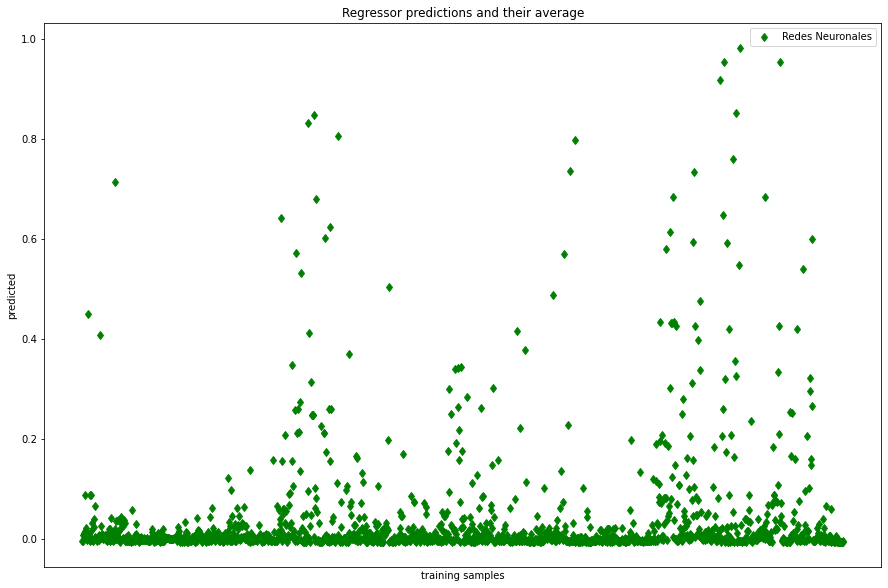

In [65]:
plt.figure(figsize=(15,10))

plt.plot(pred_posta, 'gd', label='Redes Neuronales')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()

In [66]:
#subir.to_csv('RedesNeuronales_Entrega_9.csv')

# Random Search

In [67]:
pred_posta = random_search.predict(DataFrame_test)

In [68]:
subir['target'] = pred_posta
subir

,target
Opportunity_ID,
10792,-0.019070
10806,0.041142
10812,-0.000661
10836,0.156764
10845,0.148761
...,...
12347,-0.021350
12348,-0.037968
12349,-0.040891


In [69]:
subir.describe()

,target
count,1567.000000
mean,0.070960
std,0.137000
min,-0.046708
25%,-0.027971
50%,0.020927
75%,0.127429
max,1.002148


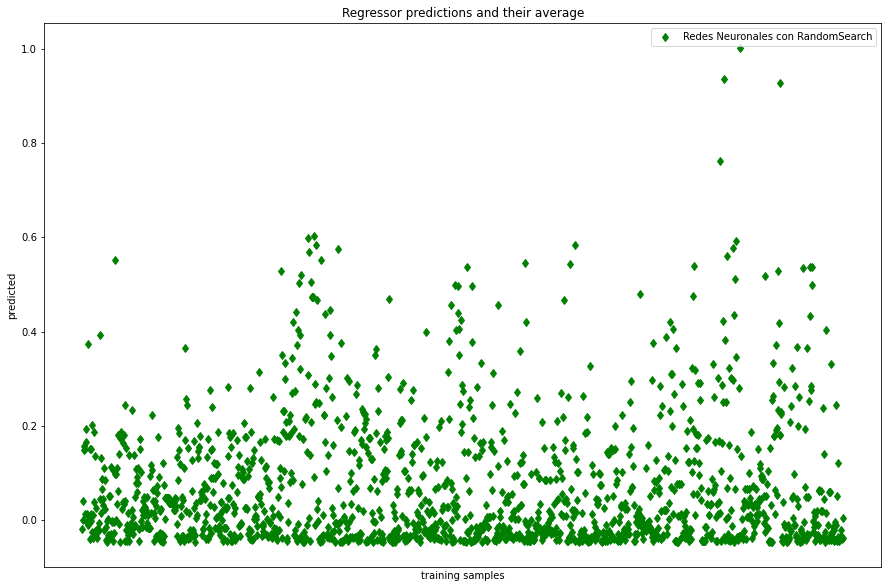

In [70]:
plt.figure(figsize=(15,10))

plt.plot(pred_posta, 'gd', label='Redes Neuronales con RandomSearch')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')


plt.show()